# Data Science Pipeline Example (Churn Prediction)

Christopher Garcia

Objective:



In [3]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load and import data
churn_data = pd.read_csv('~/Desktop/Data-Science-for-Marketing-Analytics-Second-Edition-master/Chapter07/Exercise7.02/Churn_Modelling.csv')
churn_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_data.shape

(10000, 12)

### Data Pre-processing

This step can invlove missing value inputation, data conversion, standardization of features, as well as renaming columns. 

### Impute Missing Values

In [6]:
# Check for any missing values
churn_data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [7]:
churn_data[['EstimatedSalary', 'Age']].describe()

,EstimatedSalary,Age
count,9996.000000,9994.000000
mean,100074.744083,38.925255
std,57515.774555,10.489248
min,11.580000,18.000000
25%,50974.077500,32.000000
50%,100168.240000,37.000000
75%,149388.247500,44.000000
max,199992.480000,92.000000


In [8]:
churn_data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Check count of Hascrcard
churn_data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [10]:
# Find percentage of missing values
round(churn_data.isnull().sum()/len(churn_data) * 100, 2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [11]:
churn_data[['Gender', 'Age', 'EstimatedSalary']].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [12]:
# Input missing values
mean_value = churn_data['EstimatedSalary'].mean()
churn_data['EstimatedSalary'] = churn_data['EstimatedSalary'].fillna(mean_value)

In [13]:
# Check instances of missing genders
churn_data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [14]:
# Replace with the most frequently occuring which is male
churn_data['Gender'] = churn_data['Gender'].fillna(churn_data['Gender'].value_counts().idxmax())

In [15]:
churn_data['Age'].mode()

0    37.0
dtype: float64

In [16]:
mode_value = churn_data['Age'].mode()
churn_data['Age'] = churn_data['Age'].fillna(mode_value[0])

In [17]:
churn_data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.924100,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.486207,2.892174,62397.405202,0.581654,0.45584,0.499797,57504.269099,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100134.325000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149382.097500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
churn_data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

### Renaming Columns and Changing Data Type

In [19]:
# Rename Credrate,ActMemb, ProdNumber, and Exited
churn_data = churn_data.rename(columns={
    'CredRate': 'CreditScore',
    'ActMem': 'IsActiveMember',
    'Prod Number': 'NumOfProducts',
    'Exited': 'Churn'
})
churn_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [20]:
column_churn = churn_data['Churn']
churn_data.drop(labels=['Churn'], axis=1,
               inplace=True)

churn_data.insert(len(churn_data.columns), 'Churn', column_churn.values)

In [21]:
churn_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [22]:
# Convert columns into categorical values
churn_data['Geography'] = churn_data['Geography'].astype('category')
churn_data['Gender'] = churn_data['Gender'].astype('category')
churn_data['HasCrCard'] = churn_data['HasCrCard'].astype('category')
#churn_data['Churn'] = churn_data['Churn'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  category
 3   Gender           10000 non-null  category
 4   Age              10000 non-null  float64 
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  category
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Churn            10000 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 664.7 KB


In [23]:
churn_data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


### Exploratory Data Analysis

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Churn
CustomerId,1.000000,0.005308,0.009696,-0.014883,-0.012419,0.016972,0.015272,-0.006248
CreditScore,0.005308,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352,-0.027094
Age,0.009696,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215,0.285256
Tenure,-0.014883,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407,-0.014001
Balance,-0.012419,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129,0.118533
NumOfProducts,0.016972,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132,-0.047820
EstimatedSalary,0.015272,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000,0.012234
Churn,-0.006248,-0.027094,0.285256,-0.014001,0.118533,-0.047820,0.012234,1.000000


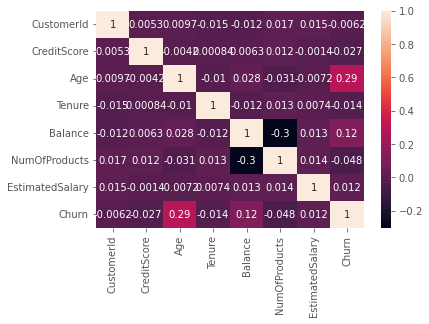

In [24]:
# Heatmap to view correlations
corr = churn_data.corr()

sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True)
corr

In [25]:
# Inspect target variable to obtain number of customers who churned
churn_data['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [26]:
# We can view this value as a percentage
print('Customers who churned:')
churn_data['Churn'].value_counts(1)*100

Customers who churned:


0    79.63
1    20.37
Name: Churn, dtype: float64

In [28]:
# Inspect the number of customers who have a credit card
print('Customers with credit cards:')
churn_data['HasCrCard'].value_counts(1)*100

Customers with credit cards:


1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [29]:
print('Average Values:')
summary_churn = churn_data.groupby('Churn')
summary_churn.mean()

Average Values:


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,,
0,1.569117e+07,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [30]:
print('Median Values:')
summary_churn.median()

Median Values:


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,,
0,15691543.0,653.0,36.0,5.0,92072.68,2.0,99645.04
1,15688963.0,646.0,45.0,5.0,109349.29,1.0,102460.84


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Churn
CustomerId,1.000000,0.005308,0.009696,-0.014883,-0.012419,0.016972,0.015272,-0.006248
CreditScore,0.005308,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352,-0.027094
Age,0.009696,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215,0.285256
Tenure,-0.014883,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407,-0.014001
Balance,-0.012419,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129,0.118533
NumOfProducts,0.016972,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132,-0.047820
EstimatedSalary,0.015272,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000,0.012234
Churn,-0.006248,-0.027094,0.285256,-0.014001,0.118533,-0.047820,0.012234,1.000000


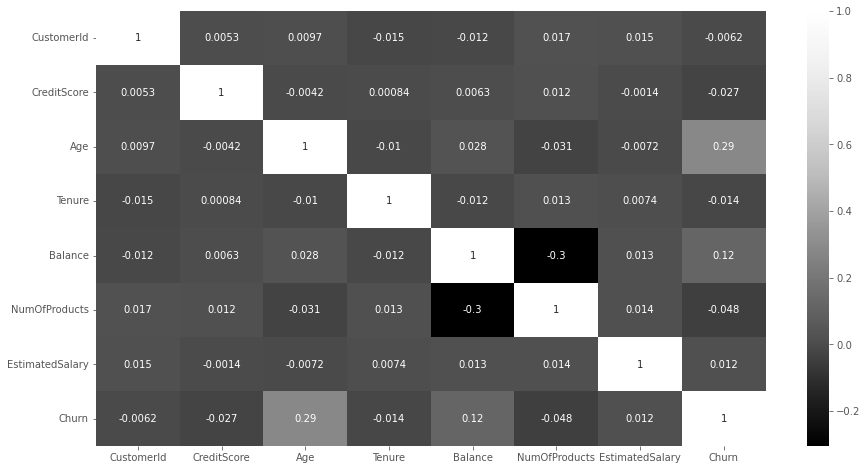

In [31]:
# Plot correlation plot
corr = churn_data.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True,
           cmap='Greys_r')
corr

**Visualize Data**


Text(0, 0.5, 'No. of Customers')

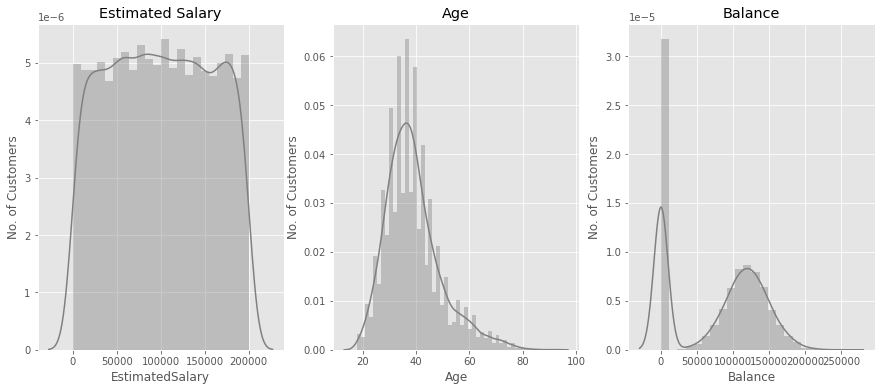

In [32]:
f, axes = plt.subplots(ncols=3, figsize=(15,6))

# First subplot
sns.distplot(churn_data.EstimatedSalary, kde=True, color='gray',
           ax=axes[0]).set_title('Estimated Salary')
axes[0].set_ylabel('No. of Customers')

# Second subplot
sns.distplot(churn_data.Age, kde=True, color='gray',
           ax=axes[1]).set_title('Age')
axes[1].set_ylabel('No. of Customers')

# Third Subplot
sns.distplot(churn_data.Balance, kde=True, color='gray',
           ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('No. of Customers')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

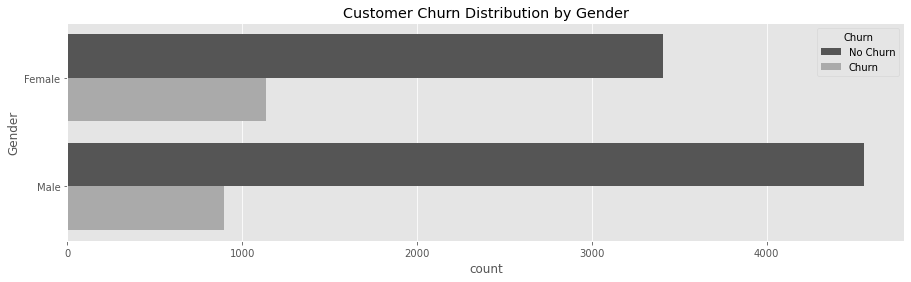

In [33]:
plt.figure(figsize=(15,4))
p = sns.countplot(y='Gender', hue='Churn', data=churn_data,
                 palette='gray')

legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')

p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

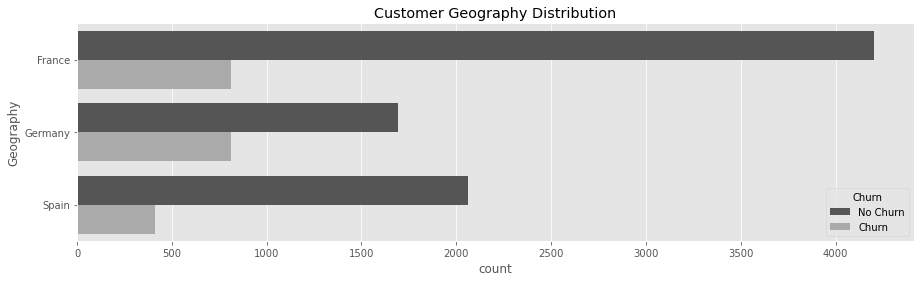

In [35]:
plt.figure(figsize=(15,4))
p = sns.countplot(y='Geography', hue='Churn', data=churn_data,
                 palette='gray')

legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')

p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

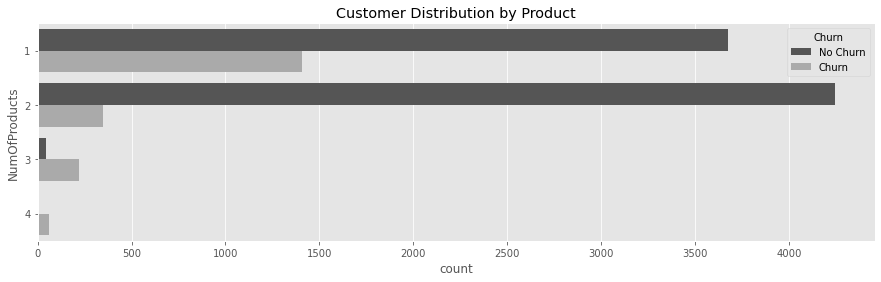

In [36]:
plt.figure(figsize=(15,4))
p = sns.countplot(y='NumOfProducts', hue='Churn', data=churn_data,
                 palette='gray')

legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')

p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - Churn Vs No Churn')

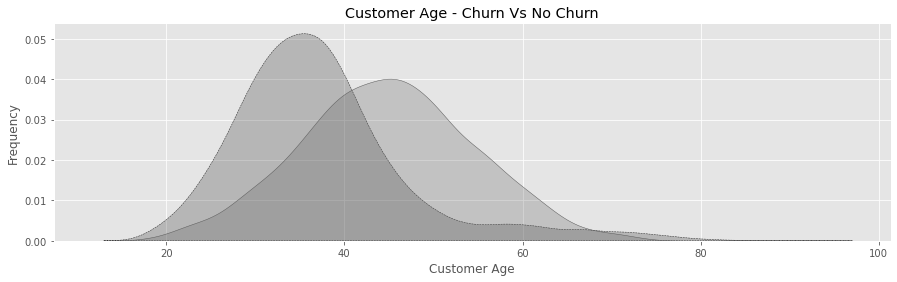

In [37]:
# Inspect churn vs age
plt.figure(figsize=(15,4))

ax = sns.kdeplot(churn_data.loc[churn_data['Churn'] == 0, 'Age'],
                color=sns.color_palette('Greys_r')[0],
                shade=True, label='no churn',
                linestyle='--')

ax = sns.kdeplot(churn_data.loc[churn_data['Churn'] == 1, 'Age'],
                color=sns.color_palette('Greys_r')[1],
                shade=True, label='churn')

ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - Churn Vs No Churn')

Text(0.5, 1.0, 'Customer Balance - Churn Vs No Churn')

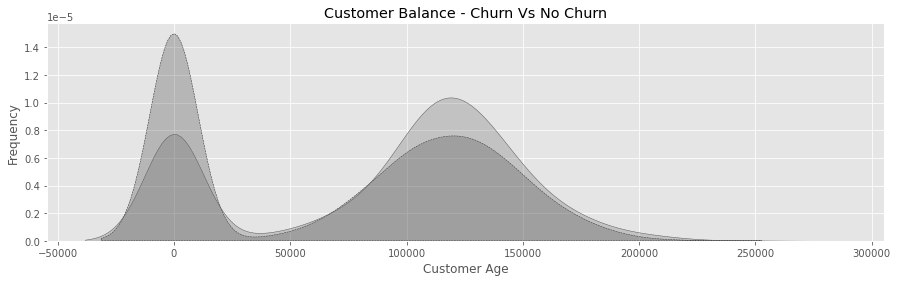

In [38]:
# Plot balance vs churn
plt.figure(figsize=(15,4))

ax = sns.kdeplot(churn_data.loc[churn_data['Churn'] == 0, 'Balance'],
                color=sns.color_palette('Greys_r')[0],
                shade=True, label='no churn',
                linestyle='--')

ax = sns.kdeplot(churn_data.loc[churn_data['Churn'] == 1, 'Balance'],
                color=sns.color_palette('Greys_r')[1],
                shade=True, label='churn')

ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Balance - Churn Vs No Churn')

Text(0.5, 1.0, 'Customer Credit Score - Churn Vs No Churn')

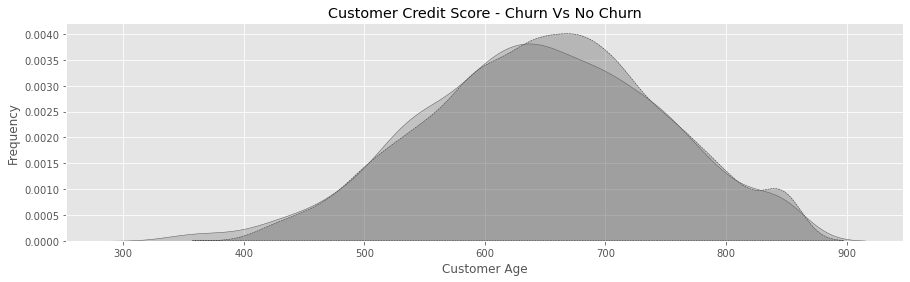

In [39]:
# PLot credit score vs churn
plt.figure(figsize=(15,4))

ax = sns.kdeplot(churn_data.loc[churn_data['Churn'] == 0, 'CreditScore'],
                color=sns.color_palette('Greys_r')[0],
                shade=True, label='no churn',
                linestyle='--')

ax = sns.kdeplot(churn_data.loc[churn_data['Churn'] == 1, 'CreditScore'],
                color=sns.color_palette('Greys_r')[1],
                shade=True, label='churn')

ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Credit Score - Churn Vs No Churn')

Text(0.5, 1.0, 'Number of Products Vs Balance')

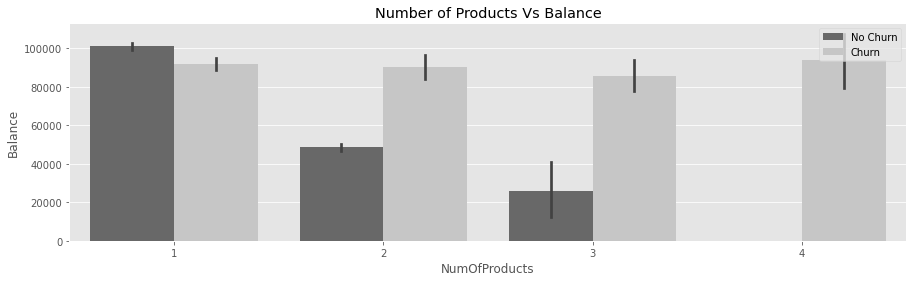

In [40]:
# Plot balance, products by churn
plt.figure(figsize=(15,4))

p = sns.barplot(x='NumOfProducts', y='Balance', hue='Churn',
               data=churn_data, palette='Greys_r')

p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')

p.set_title('Number of Products Vs Balance')

### Modeling

**Tree-Based Feature Selection**

For the feature selection for our problem, we are going to use another classification algorithm known as a `random forest`. Before using a random forest, we have to standardize and scale our data for the classifier to work. Using a random forest can provide excellent results as it can use a large number of classifiers and takes into account overfitting.

In [41]:
# Encode categorical features
churn_data['Geography'] = churn_data['Geography'].astype('category').cat.codes
churn_data['Gender'] = churn_data['Gender'].astype('category').cat.codes
churn_data['HasCrCard'] = churn_data['HasCrCard'].astype('category').cat.codes
churn_data['Churn'] = churn_data['Churn'].astype('category').cat.codes

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  int8    
 3   Gender           10000 non-null  int8    
 4   Age              10000 non-null  float64 
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  int8    
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Churn            10000 non-null  int8    
dtypes: category(1), float64(3), int64(4), int8(4)
memory usage: 595.9 KB


In [42]:
# Split data
target = 'Churn'
X = churn_data.drop('Churn', axis=1)
y = churn_data[target]

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y,
                                                   test_size=0.15,
                                                   random_state=123,
                                                   stratify=y)

In [43]:
# Run tree-based feature selction
forest = RandomForestClassifier(n_estimators=500,
                               random_state=1)

forest.fit(X_Train, y_Train)

RandomForestClassifier(n_estimators=500, random_state=1)

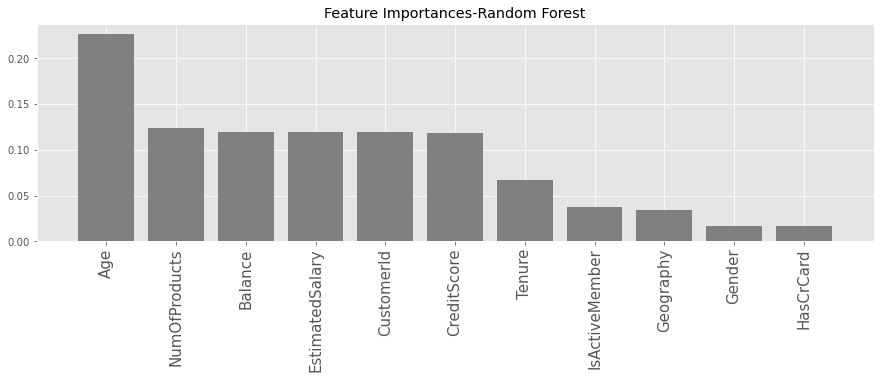

In [44]:
# Get feature importances
importances = forest.feature_importances_
features = churn_data.drop(['Churn'], axis=1).columns
indices = np.argsort(importances)[::-1]

# Plot important features
plt.figure(figsize=(15,4))
plt.title('Feature Importances-Random Forest')
plt.bar(range(X_Train.shape[1]), importances[indices], color='gray', align='center')
plt.xticks(range(X_Train.shape[1]), features[indices], rotation='vertical', fontsize=15)
plt.xlim([-1, X_Train.shape[1]])
plt.show()

In [45]:
feature_importance_df = pd.DataFrame({'Feature': features,
                                     'Importance': importances})
feature_importance_df

,Feature,Importance
0,CustomerId,0.119144
1,CreditScore,0.118316
2,Geography,0.034728
3,Gender,0.017226
4,Age,0.226433
5,Tenure,0.067542
6,Balance,0.119634
7,NumOfProducts,0.123679
8,HasCrCard,0.016369
9,IsActiveMember,0.037644


**Model Building**

In [46]:
logReg = LogisticRegression(random_state=0, solver='lbfgs')
logReg.fit(X_Train[features], y_Train)

LogisticRegression(random_state=0)

In [47]:
# Predict probabilities
logReg.predict(X_Test[features])
logReg.predict_proba(X_Test[features])

array([[0.76579389, 0.23420611],
       [0.80778327, 0.19221673],
       [0.71306393, 0.28693607],
       ...,
       [0.82337006, 0.17662994],
       [0.76193917, 0.23806083],
       [0.75648071, 0.24351929]])

In [48]:
# Calculate accuracy of model
print('Model Accuracy:')
logReg.score(X_Test[features], y_Test)

Model Accuracy:


0.796